# Lab 5

**Data:**

https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in CNN_and_Transfer_Learning.ipynb and fit neural networks for solving the binary classification task.

In [26]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.applications import VGG16
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Part 1

**1. Build and fit CNN with 3 convolutional layers for binary classification**

In [5]:
#from google.colab import drive
#drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = '/Users/andreiivlev/Desktop/ITMO/MLT/task5/Cats_and_Dogs/train'
val =   '/Users/andreiivlev/Desktop/ITMO/MLT/task5/Cats_and_Dogs/val'
test =  '/Users/andreiivlev/Desktop/ITMO/MLT/task5/Cats_and_Dogs/test'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64
# train set size
nb_train_samples = sum([len(files) for subdir, dirs, files in os.walk(train)])
# validation set size
nb_validation_samples = sum([len(files) for subdir, dirs, files in os.walk(val)])
# test set size
nb_test_samples = sum([len(files) for subdir, dirs, files in os.walk(test)])


## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [5]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [6]:
model = Sequential()

# 1: Convolutional layer
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))

# 2: MaxPooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3: Convolutional layer
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

# 4: MaxPooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# 5: Convolutional layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

# 6: MaxPooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# 7: Flatten operation
model.add(Flatten())

# 8: Fully connected layer
model.add(Dense(64))
model.add(Activation('relu'))

# 9: Dropout
model.add(Dropout(0.5))

# 10: Fully connected layer
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [11]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [29]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10


/var/folders/c0/nrfkwrfx361g1h1mjxyjhtg00000gn/T/ipykernel_52714/2353336252.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


312/312 [==============================] - 37s 119ms/step - loss: 0.1279 - accuracy: 0.9487 - val_loss: 0.4585 - val_accuracy: 0.8433
Epoch 2/10
312/312 [==============================] - 36s 116ms/step - loss: 0.1053 - accuracy: 0.9587 - val_loss: 0.5170 - val_accuracy: 0.8491
Epoch 3/10
312/312 [==============================] - 36s 117ms/step - loss: 0.0978 - accuracy: 0.9611 - val_loss: 0.5698 - val_accuracy: 0.8462
Epoch 4/10
312/312 [==============================] - 36s 117ms/step - loss: 0.0882 - accuracy: 0.9642 - val_loss: 0.6018 - val_accuracy: 0.8487
Epoch 5/10
312/312 [==============================] - 37s 117ms/step - loss: 0.0844 - accuracy: 0.9668 - val_loss: 0.6359 - val_accuracy: 0.8384
Epoch 6/10
312/312 [==============================] - 36s 116ms/step - loss: 0.0732 - accuracy: 0.9711 - val_loss: 0.6657 - val_accuracy: 0.8421
Epoch 7/10
312/312 [==============================] - 37s 118ms/step - loss: 0.0710 - accuracy: 0.9717 - val_loss: 0.6358 - val_accuracy: 0.8

**2. Evaluate accuracy on test data**

In [30]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong

scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/var/folders/c0/nrfkwrfx361g1h1mjxyjhtg00000gn/T/ipykernel_52714/2304885300.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 85.18%


**Printing plots**

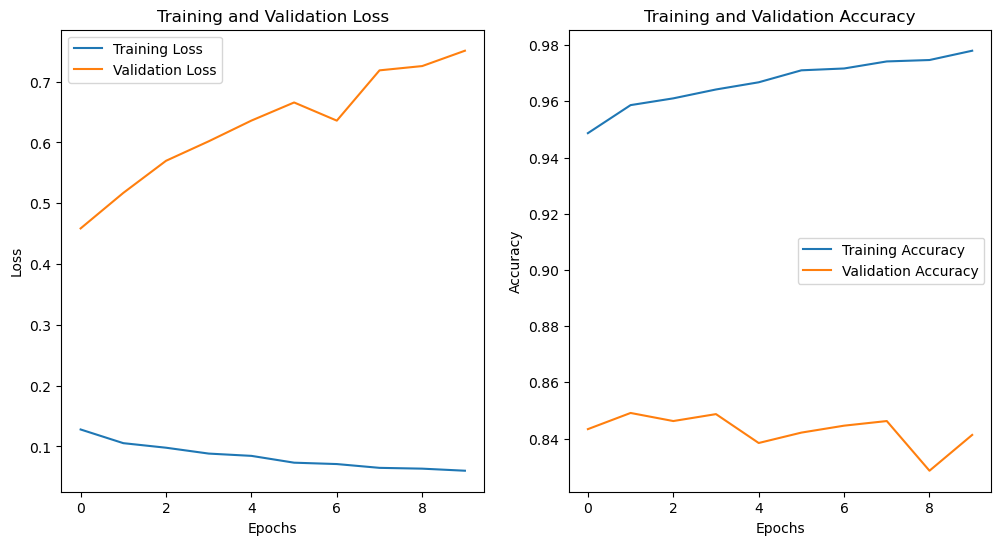

In [31]:
history_dict = history.history

# Plot loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Part 2

**1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.**

In [32]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16

# Download the VGG16 network, excluding the top fully connected layers,
# and set the input shape to (150, 150, 3) for processing images of this size.
vgg16_net = VGG16(weights='imagenet',
                  include_top=False,  # Exclude fully connected layers
                  input_shape=(150, 150, 3))

# Set the VGG16 network to be non-trainable
vgg16_net.trainable = False

# Print the summary of the network
vgg16_net.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [33]:
# Initialize the model
model_vgg16 = Sequential()

# Add the VGG16 convolutional base
model_vgg16.add(vgg16_net)

# Add new layers
model_vgg16.add(Flatten())  # Flatten the output of the convolutional base
model_vgg16.add(Dense(256, activation='relu'))  # Add a fully connected layer with 256 neurons and ReLU activation
model_vgg16.add(Dropout(0.5))  # Add a dropout layer for regularization
model_vgg16.add(Dense(1, activation='sigmoid'))  # Add a final Dense layer with 1 neuron and sigmoid activation for binary classification

# Display the model's architecture
model_vgg16.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [34]:
model_vgg16.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-5),
              metrics=['accuracy'])

In [35]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

history_vgg16 = model_vgg16.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10


/var/folders/c0/nrfkwrfx361g1h1mjxyjhtg00000gn/T/ipykernel_52714/1492900122.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_vgg16 = model_vgg16.fit_generator(


312/312 [==============================] - 501s 2s/step - loss: 0.4888 - accuracy: 0.7568 - val_loss: 0.3423 - val_accuracy: 0.8651
Epoch 2/10
312/312 [==============================] - 494s 2s/step - loss: 0.3354 - accuracy: 0.8550 - val_loss: 0.2894 - val_accuracy: 0.8894
Epoch 3/10
312/312 [==============================] - 491s 2s/step - loss: 0.2946 - accuracy: 0.8753 - val_loss: 0.2674 - val_accuracy: 0.8951
Epoch 4/10
312/312 [==============================] - 495s 2s/step - loss: 0.2709 - accuracy: 0.8848 - val_loss: 0.2516 - val_accuracy: 0.9042
Epoch 5/10
312/312 [==============================] - 506s 2s/step - loss: 0.2549 - accuracy: 0.8930 - val_loss: 0.2414 - val_accuracy: 0.9067
Epoch 6/10
312/312 [==============================] - 496s 2s/step - loss: 0.2431 - accuracy: 0.8975 - val_loss: 0.2354 - val_accuracy: 0.9124
Epoch 7/10
312/312 [==============================] - 506s 2s/step - loss: 0.2338 - accuracy: 0.9016 - val_loss: 0.2295 - val_accuracy: 0.9149
Epoch 8/10

**2. Do the same with one more avaliable pre-trained deep learning model from keras application, for example Xception - https://keras.io/api/applications/.**

In [60]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import Xception

# Load the Xception network with pretrained ImageNet weights, excluding the top
xception_base = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
xception_base.trainable = False  # Set the Xception network to be non-trainable

# Initialize the model
model_xception = Sequential()

# Add the Xception convolutional base
model_xception.add(xception_base)

# Since Xception uses 'channels_last', we use GlobalAveragePooling2D to pool over the spatial dimensions
model_xception.add(GlobalAveragePooling2D())  # Add global average pooling layer

# Add a fully connected layer with 256 neurons and ReLU activation
model_xception.add(Dense(256, activation='relu'))

# Add a dropout layer for regularization
model_xception.add(Dropout(0.5))

# Add a final Dense layer with 1 neuron and sigmoid activation for binary classification
model_xception.add(Dense(1, activation='sigmoid'))

# Display the model's architecture
model_xception.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_8 (Dense)             (None, 256)               524544    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21386281 (81.58 MB)
Trainable params: 524801 (2.00 MB)
Non-trainable params: 20861480 (79.58 MB)
_________

In [61]:
model_xception.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-5),
              metrics=['accuracy'])

In [62]:
history_xception = model_xception.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10


/var/folders/c0/nrfkwrfx361g1h1mjxyjhtg00000gn/T/ipykernel_52714/3120918533.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_xception = model_xception.fit_generator(


312/312 [==============================] - 159s 507ms/step - loss: 0.3796 - accuracy: 0.8320 - val_loss: 0.1714 - val_accuracy: 0.9494
Epoch 2/10
312/312 [==============================] - 154s 493ms/step - loss: 0.1626 - accuracy: 0.9421 - val_loss: 0.1249 - val_accuracy: 0.9556
Epoch 3/10
312/312 [==============================] - 153s 490ms/step - loss: 0.1275 - accuracy: 0.9529 - val_loss: 0.1084 - val_accuracy: 0.9605
Epoch 4/10
312/312 [==============================] - 161s 515ms/step - loss: 0.1114 - accuracy: 0.9569 - val_loss: 0.1024 - val_accuracy: 0.9597
Epoch 5/10
312/312 [==============================] - 157s 503ms/step - loss: 0.1023 - accuracy: 0.9609 - val_loss: 0.0990 - val_accuracy: 0.9613
Epoch 6/10
312/312 [==============================] - 158s 505ms/step - loss: 0.0948 - accuracy: 0.9637 - val_loss: 0.0985 - val_accuracy: 0.9601
Epoch 7/10
312/312 [==============================] - 158s 507ms/step - loss: 0.0946 - accuracy: 0.9639 - val_loss: 0.0941 - val_accura

**3. Evaluate accuracy on test data for p.1 and p.2**

In [36]:
scores = model_vgg16.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/var/folders/c0/nrfkwrfx361g1h1mjxyjhtg00000gn/T/ipykernel_52714/744118947.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model_vgg16.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 90.46%


In [63]:
scores = model_xception.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/var/folders/c0/nrfkwrfx361g1h1mjxyjhtg00000gn/T/ipykernel_52714/3362309515.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model_xception.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 95.67%


**4. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)**

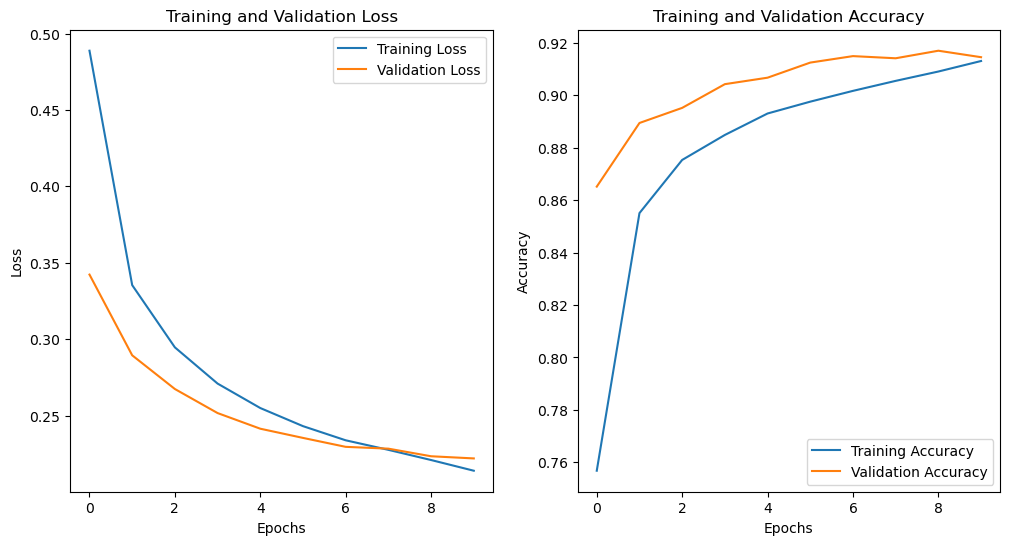

In [37]:
history_dict_vgg16 = history_vgg16.history

# Plot loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_dict_vgg16['loss'], label='Training Loss')
plt.plot(history_dict_vgg16['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history_dict_vgg16['accuracy'], label='Training Accuracy')
plt.plot(history_dict_vgg16['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

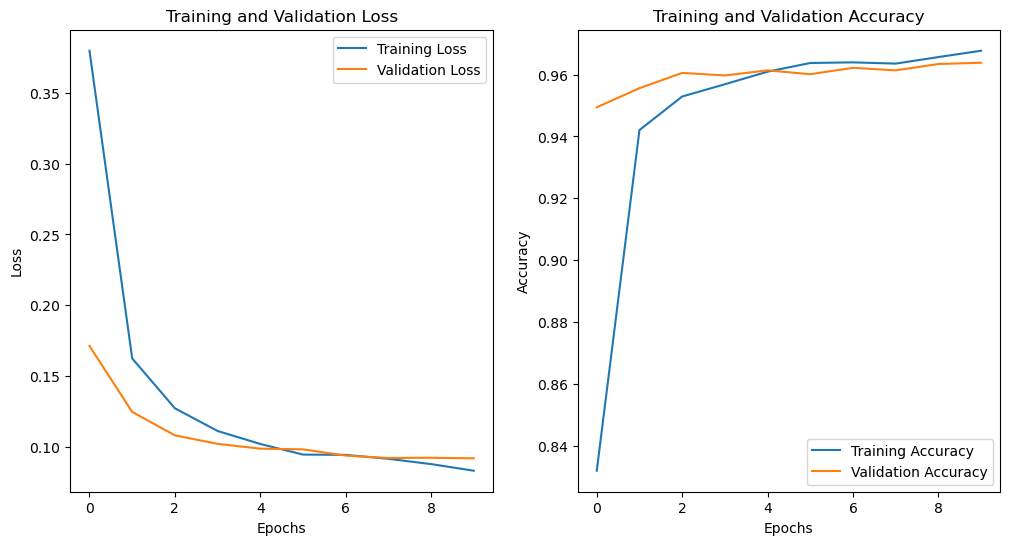

In [64]:
history_dict_xception = history_xception.history

# Plot loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_dict_xception['loss'], label='Training Loss')
plt.plot(history_dict_xception['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history_dict_xception['accuracy'], label='Training Accuracy')
plt.plot(history_dict_xception['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**5. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.**

In [65]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

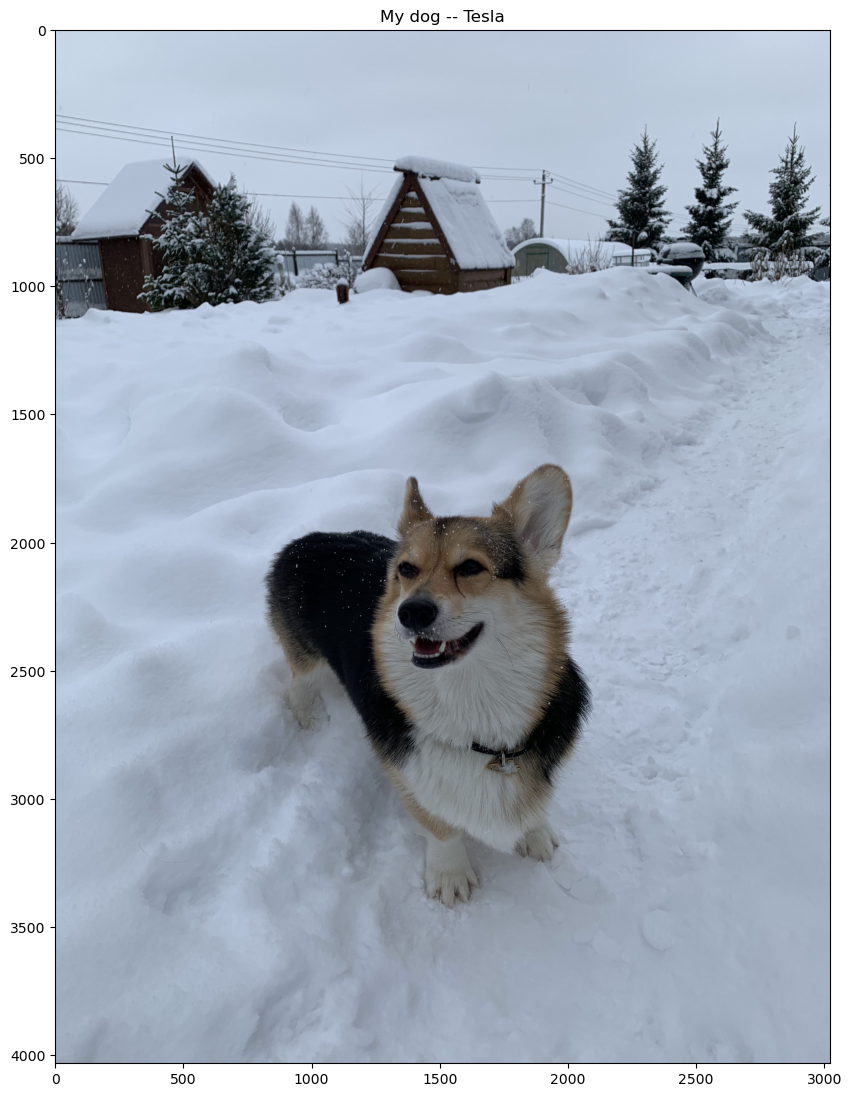

In [66]:
img_dog = mpimg.imread('/Users/andreiivlev/Desktop/ITMO/MLT/task5/dog.jpg')
plt.figure(figsize = (10,20))
plt.title('My dog -- Tesla')
plt.imshow(img_dog)
plt.show()

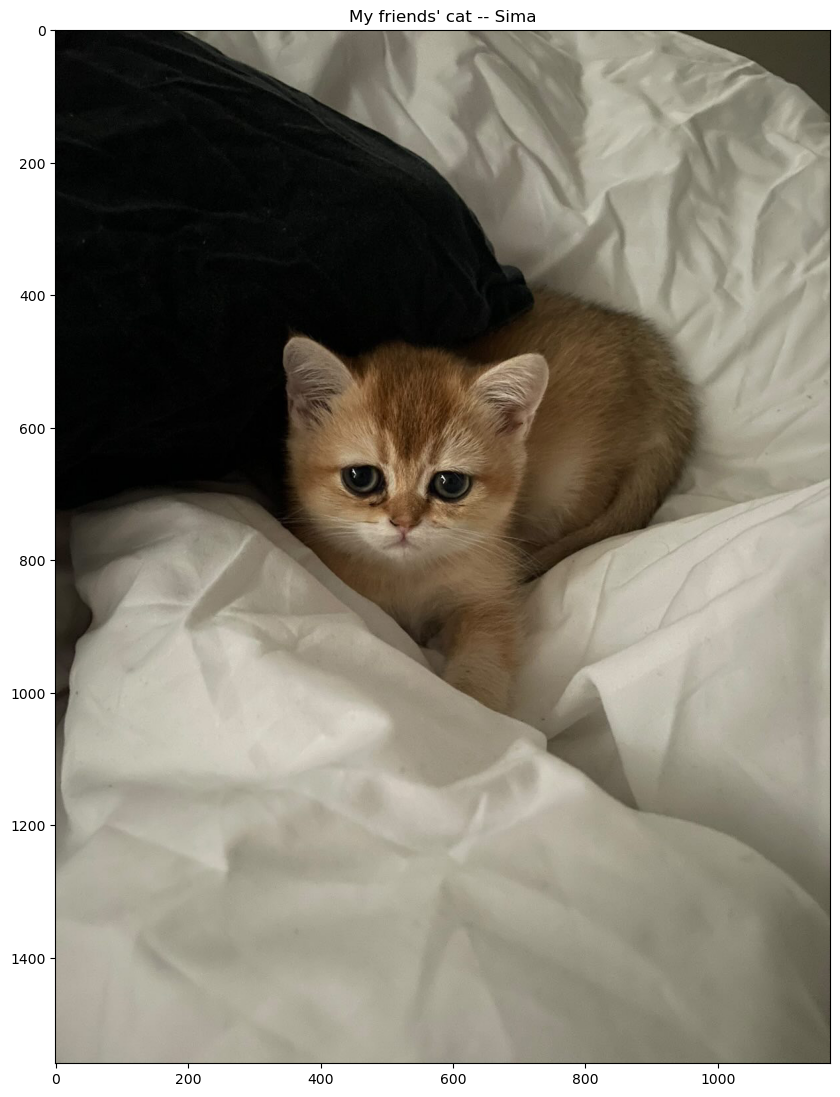

In [67]:
img_cat = mpimg.imread('/Users/andreiivlev/Desktop/ITMO/MLT/task5/cat.jpg')
plt.figure(figsize = (10,20))
plt.title("My friends' cat -- Sima")
plt.imshow(img_cat)
plt.show()

In [68]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

img_path_dog = '/Users/andreiivlev/Desktop/ITMO/MLT/task5/dog.jpg'
img_dog = image.load_img(img_path_dog, target_size=(150, 150))

x = image.img_to_array(img_dog)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

predictions = model_vgg16.predict(x)

# Since the final layer is a sigmoid, the output will be a float between 0 and 1
print("Predicted probability:", predictions[0][0])
predicted_class = 'dog' if predictions[0][0] > 0.5 else 'cat'
print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 45ms/step
Predicted probability: 1.0
Predicted class: dog


In [70]:
from tensorflow.keras.applications.vgg16 import preprocess_input

img_path_cat = '/Users/andreiivlev/Desktop/ITMO/MLT/task5/cat.jpg'
img_cat = image.load_img(img_path_cat, target_size=(150, 150))

y = image.img_to_array(img_cat)
y = np.expand_dims(y, axis=0)
y = preprocess_input(y)

predictions = model_vgg16.predict(y)

print("Predicted probability:", predictions[0][0])
predicted_class = 'dog' if predictions[0][0] > 0.5 else 'cat'
print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 45ms/step
Predicted probability: 1.0167766e-27
Predicted class: cat


In [85]:
from tensorflow.keras.applications.xception import preprocess_input

img_path_dog = '/Users/andreiivlev/Desktop/ITMO/MLT/task5/dog.jpg'
img_dog = image.load_img(img_path_dog, target_size=(150, 150))

x = image.img_to_array(img_dog)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

predictions = model_xcpetion.predict(x)

# Since the final layer is a sigmoid, the output will be a float between 0 and 1
print("Predicted probability:", predictions[0][0])
predicted_class = 'dog' if predictions[0][0] > 0.5 else 'cat'
print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 27ms/step
Predicted probability: 0.98900676
Predicted class: dog


In [84]:
from tensorflow.keras.applications.xception import preprocess_input

img_path_cat = '/Users/andreiivlev/Desktop/ITMO/MLT/task5/cat.jpg'
img_cat = image.load_img(img_path_cat, target_size=(150, 150))

y = image.img_to_array(img_cat)
y = np.expand_dims(y, axis=0)
y = preprocess_input(y)

predictions = model_xcpetion.predict(y)

print("Predicted probability:", predictions[0][0])
predicted_class = 'dog' if predictions[0][0] > 0.5 else 'cat'
print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 34ms/step
Predicted probability: 0.020703861
Predicted class: cat


**Both models have succesfully identified the cat and the dog on my pictures**

# Clip


## Imports

In [119]:
import torch
from torch.utils.data import DataLoader
from transformers import CLIPProcessor, CLIPModel
from torchvision.datasets import ImageFolder
from torch.optim import AdamW
from tqdm import tqdm
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


## Utils

In [120]:

def classify(image_path):
    image = Image.open(image_path)
    inputs = processor(text=["cat", "dog"], images=image, return_tensors="pt", padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
        logits_per_image = outputs.logits_per_image
        probs = logits_per_image.softmax(dim=1) 
    return torch.argmax(probs).item()

def train_epoch(model , data_loader, loss_fn, optimizer, device):
    model.train()
    for batch in tqdm(data_loader):
        images, labels = batch
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        image_features = model.get_image_features(pixel_values=images)
        logits = model.classification_head(image_features)
        
        loss = loss_fn(logits, labels)
        loss.backward()
        optimizer.step()

def evaluate(model, data_loader, loss_fn, device):
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in data_loader:
            images, labels = batch
            images = images.to(device)
            labels = labels.to(device)

            image_features = model.get_image_features(pixel_values=images)
            logits = model.classification_head(image_features)
            
            loss = loss_fn(logits, labels)
            val_loss += loss.item()

    return val_loss / len(data_loader)

def infer_single_image(image_path, processor, model, device):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt", padding=True)
    pixel_values = inputs['pixel_values'].to(device)
    
    with torch.no_grad():
        image_features = model.get_image_features(pixel_values=pixel_values)
        logits = model.classification_head(image_features)
    
    probabilities = torch.nn.functional.softmax(logits, dim=-1)
    
    predicted_class_idx = torch.argmax(probabilities, dim=-1).item()
    
    return predicted_class_idx, probabilities

def Clip_predict(dogs_test_photos,
                 cats_test_photos,
                dogs_test_paths,
                cats_test_path,
                processor,
                model,
                device):
    
    cats_test_preds = [infer_single_image(os.path.join(cats_test_path,cat_test_photo), processor, model, device)[0] for cat_test_photo in tqdm(cats_test_photos)]
    dogs_test_preds = [infer_single_image(os.path.join(dogs_test_paths,dogs_test_photo), processor, model, device)[0] for dogs_test_photo in tqdm(dogs_test_photos)]
    return dogs_test_preds,cats_test_preds

def calc_accuracy(dogs_preds,cats_preds):
    accuracy = ((sum(dogs_preds)/1250)+1-(sum(cats_preds)/1250))/2
    return accuracy

## CLIP Model adjustment

In [121]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [122]:
model.classification_head = torch.nn.Linear(model.config.projection_dim, 2).to(device)

for param in model.parameters():
    param.requires_grad = False
for param in model.classification_head.parameters():
    param.requires_grad = True
# Changed
lr = 5e-5
criterion = torch.nn.CrossEntropyLoss()
optimizer = AdamW(model.classification_head.parameters(), lr=lr)



## Data

#### Val

In [123]:
cats_val_path = '/Users/andreiivlev/Desktop/ITMO/MLT/task5/Cats_and_Dogs/val/cats'
dogs_val_paths = '/Users/andreiivlev/Desktop/ITMO/MLT/task5/Cats_and_Dogs/val/dogs'

cats_val_photos = os.listdir(cats_val_path)
dogs_val_photos = os.listdir(dogs_val_paths)

if '.DS_Store' in cats_val_photos: cats_val_photos.remove('.DS_Store')
if '.DS_Store' in dogs_val_photos: dogs_val_photos.remove('.DS_Store')

#### Test

In [124]:
cats_classes = []
dog_classes = []

cats_test_path = '/Users/andreiivlev/Desktop/ITMO/MLT/task5/Cats_and_Dogs/test/cats'
dogs_test_paths = '/Users/andreiivlev/Desktop/ITMO/MLT/task5/Cats_and_Dogs/test/dogs'

cats_test_photos = os.listdir(cats_test_path)
dogs_test_photos = os.listdir(dogs_test_paths)

if '.DS_Store' in cats_test_photos: cats_test_photos.remove('.DS_Store')
if '.DS_Store' in dogs_test_photos: dogs_test_photos.remove('.DS_Store')

In [125]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224), 
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.ToTensor(), # Convert image to tensor
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

train_dataset = ImageFolder(root='/Users/andreiivlev/Desktop/ITMO/MLT/task5/Cats_and_Dogs/train', transform=train_transforms)
val_dataset = ImageFolder(root='/Users/andreiivlev/Desktop/ITMO/MLT/task5/Cats_and_Dogs/val', transform=val_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

## Clip classification head Training 


In [126]:
epochs = 3
val_loss_list = []
val_accuracy_list = []
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss = evaluate(model, val_loader, criterion, device)
    print(f"Validation loss: {val_loss:.4f}")

    #model.eval()
    dogs_val_preds,cats_val_preds = Clip_predict(dogs_val_photos,cats_val_photos,dogs_val_paths,cats_val_path,processor,model,device)
    acc = calc_accuracy(dogs_val_preds,cats_val_preds)
    val_accuracy_list.append(acc)
    val_loss_list.append(val_loss)

model.save_pretrained(f'fine_tuned_CLIP_n_epoch{epochs}_lr_{lr}')

Epoch 1/3


100%|█████████████████████████████████████████| 625/625 [05:16<00:00,  1.97it/s]


Validation loss: 0.1908


100%|███████████████████████████████████████| 1250/1250 [00:54<00:00, 22.85it/s]


Epoch 2/3


100%|█████████████████████████████████████████| 625/625 [05:19<00:00,  1.96it/s]


Validation loss: 0.0903


100%|███████████████████████████████████████| 1250/1250 [00:54<00:00, 22.89it/s]


Epoch 3/3


100%|█████████████████████████████████████████| 625/625 [05:13<00:00,  1.99it/s]


Validation loss: 0.0550


100%|███████████████████████████████████████| 1250/1250 [00:53<00:00, 23.40it/s]


In [127]:
val_loss_list

[0.1907506103699024, 0.09025569766377792, 0.05502522574403347]

## Clip clasification head Inference 


In [128]:
model.eval()
dogs_test_preds,cats_test_preds = Clip_predict(dogs_test_photos,cats_test_photos,dogs_test_paths,cats_test_path,processor,model,device)
acc = calc_accuracy(dogs_test_preds,cats_test_preds)
print(f"Test accuracy: {acc:.10f}")


100%|███████████████████████████████████████| 1250/1250 [00:52<00:00, 23.71it/s]

Test accuracy: 0.9960000000


In [129]:
# For dogs (classified as 0)
dog_paths = [path for path, pred in zip(dogs_test_photos, dogs_test_preds) if pred == 0]

# For cats (classified as 1)
cat_paths = [path for path, pred in zip(cats_test_photos, cats_test_preds) if pred == 1]


In [130]:
dog_paths

['dog.10237.jpg',
 'dog.10155.jpg',
 'dog.10801.jpg',
 'dog.10797.jpg',
 'dog.10401.jpg']

In [131]:
cat_paths

['cat.11184.jpg',
 'cat.10539.jpg',
 'cat.10712.jpg',
 'cat.11222.jpg',
 'cat.10029.jpg']